Evaluating the Role of High-Yield Bonds in Portfolio Performance and Risk Management: An Analysis of Tax Implications and Allocation Strategies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
agg = pd.read_csv('./Input/AGG.csv')
jnk = pd.read_csv('./Input/jnk.csv') 
spy = pd.read_csv('./Input/SPY.csv') 

# Convert 'Date' columns to datetime
agg['Date'] = pd.to_datetime(agg['Date'])
jnk['Date'] = pd.to_datetime(jnk['Date'])
spy['Date'] = pd.to_datetime(spy['Date'])

start_date = '2010-06-14'
end_date = '2024-06-14'
# filter the Date from 2014-06-16 to 2024-06-14
agg = agg[(agg['Date'] >= start_date) & (agg['Date'] <= end_date)]
jnk = jnk[(jnk['Date'] >= start_date) & (jnk['Date'] <= end_date)]
spy = spy[(spy['Date'] >= start_date) & (spy['Date'] <= end_date)]


In [3]:
# check missing value for each dataframe
print(agg.isnull().sum())
print(jnk.isnull().sum())
print(spy.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [4]:
# check if the Date Variables align with each other
# Assuming agg, jnk, and spy are your DataFrames
agg_dates = set(agg['Date'])
jnk_dates = set(jnk['Date'])
spy_dates = set(spy['Date'])

# Check for differences
agg_jnk_diff = agg_dates.symmetric_difference(jnk_dates)
agg_spy_diff = agg_dates.symmetric_difference(spy_dates)
jnk_spy_diff = jnk_dates.symmetric_difference(spy_dates)

print(f"Differences between AGG and JNK dates: {agg_jnk_diff}")
print(f"Differences between AGG and SPY dates: {agg_spy_diff}")
print(f"Differences between JNK and SPY dates: {jnk_spy_diff}")

Differences between AGG and JNK dates: set()
Differences between AGG and SPY dates: set()
Differences between JNK and SPY dates: set()


The output indicates that there are no differences in the Date columns between the DataFrames agg, jnk, and spy. 

In [5]:
# Calculate daily returns
agg['DailyReturn'] = agg['Adj Close'].pct_change()
jnk['DailyReturn'] = jnk['Adj Close'].pct_change()
spy['DailyReturn'] = spy['Adj Close'].pct_change()

# Calculate cumulative returns
agg['cumret'] = (1 + agg['DailyReturn']).cumprod() - 1
jnk['cumret'] = (1 + jnk['DailyReturn']).cumprod() - 1
spy['cumret'] = (1 + spy['DailyReturn']).cumprod() - 1

# Calculate log returns
agg['LogReturn'] = np.log(agg['Adj Close'] / agg['Adj Close'].shift(1))
jnk['LogReturn'] = np.log(jnk['Adj Close'] / jnk['Adj Close'].shift(1))
spy['LogReturn'] = np.log(spy['Adj Close'] / spy['Adj Close'].shift(1))

In [6]:
agg.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,DailyReturn,cumret,LogReturn
1519,2010-06-14,105.639999,105.809998,105.459999,105.809998,73.481186,600200,NaN,NaN,NaN
1520,2010-06-15,105.860001,105.949997,105.650002,105.809998,73.481186,882800,0.000000,0.000000,0.000000
1521,2010-06-16,105.720001,105.989998,105.720001,105.970001,73.592323,654100,0.001512,0.001512,0.001511
1522,2010-06-17,105.949997,106.349998,105.949997,106.220001,73.765938,776100,0.002359,0.003875,0.002356
1523,2010-06-18,106.339996,106.339996,106.029999,106.050003,73.647842,634000,-0.001601,0.002268,-0.001602
1524,2010-06-21,105.970001,106.279999,105.820000,106.279999,73.807564,696100,0.002169,0.004442,0.002166
1525,2010-06-22,106.279999,106.459999,106.129997,106.389999,73.883987,560100,0.001035,0.005482,0.001035
1526,2010-06-23,106.349998,106.739998,106.349998,106.660004,74.071510,334200,0.002538,0.008034,0.002535
1527,2010-06-24,106.800003,106.879997,106.489998,106.570000,74.009003,812300,-0.000844,0.007183,-0.000844
1528,2010-06-25,106.470001,106.790001,106.470001,106.720001,74.113136,513800,0.001407,0.008600,0.001406


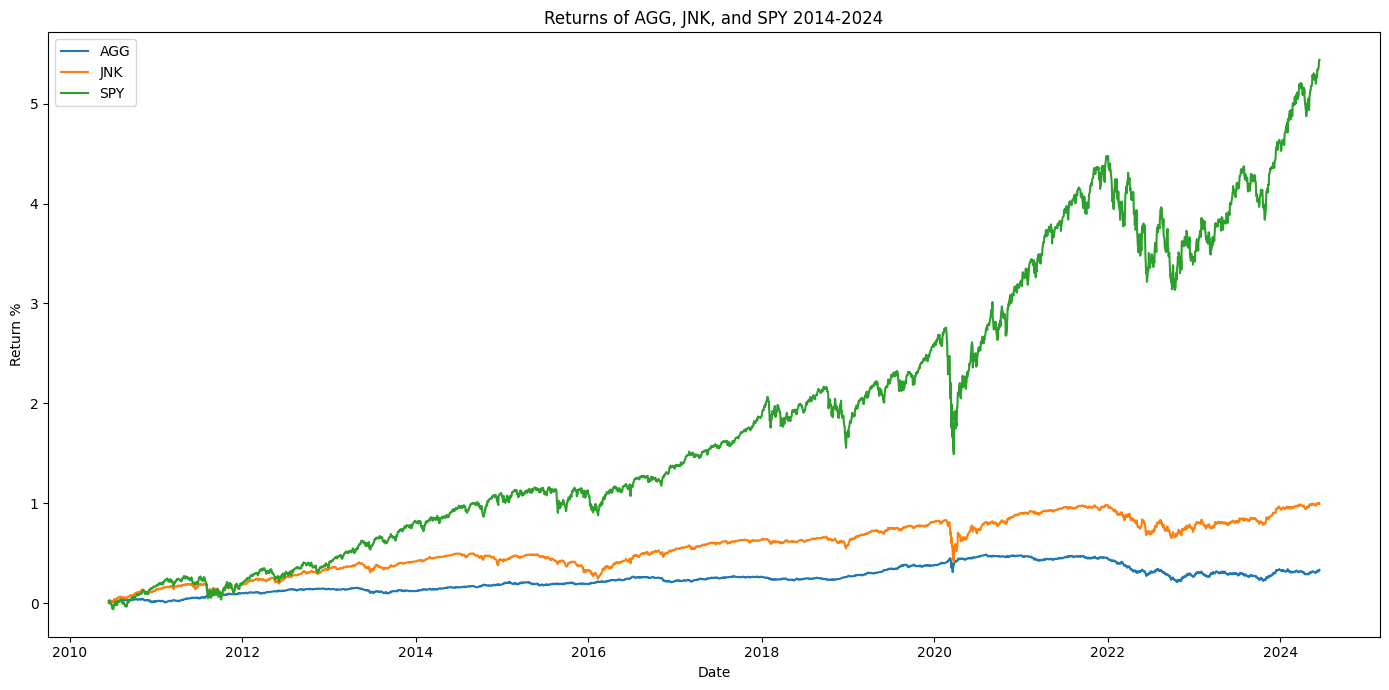

In [7]:
# Plotting
plt.figure(figsize=(14, 7))

plt.plot(agg['Date'], agg['cumret'], label='AGG')
plt.plot(jnk['Date'], jnk['cumret'], label='JNK')
plt.plot(spy['Date'], spy['cumret'], label='SPY')

plt.title('Returns of AGG, JNK, and SPY 2014-2024')
plt.xlabel('Date')
plt.ylabel('Return %')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# Retrieve the default color cycle
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [9]:
# # Retrieve the default color cycle
# default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# # Plotting
# plt.figure(figsize=(14, 7))

# plt.subplot(3, 1, 1)
# plt.plot(agg['Date'], agg['LogReturn'], label='AGG', color=default_colors[0])
# plt.title('AGG Log Returns 2014-2024')
# plt.xlabel('Date')
# plt.ylabel('Log Return')
# plt.legend()

# plt.subplot(3, 1, 2)
# plt.plot(jnk['Date'], jnk['LogReturn'], label='JNK', color=default_colors[1])
# plt.title('JNK Log Returns 2014-2024')
# plt.xlabel('Date')
# plt.ylabel('Log Return')
# plt.legend()

# plt.subplot(3, 1, 3)
# plt.plot(spy['Date'], spy['LogReturn'], label='SPY', color=default_colors[2])
# plt.title('SPY Log Returns 2014-2024')
# plt.xlabel('Date')
# plt.ylabel('Log Return')
# plt.legend()

# plt.tight_layout()
# plt.show()

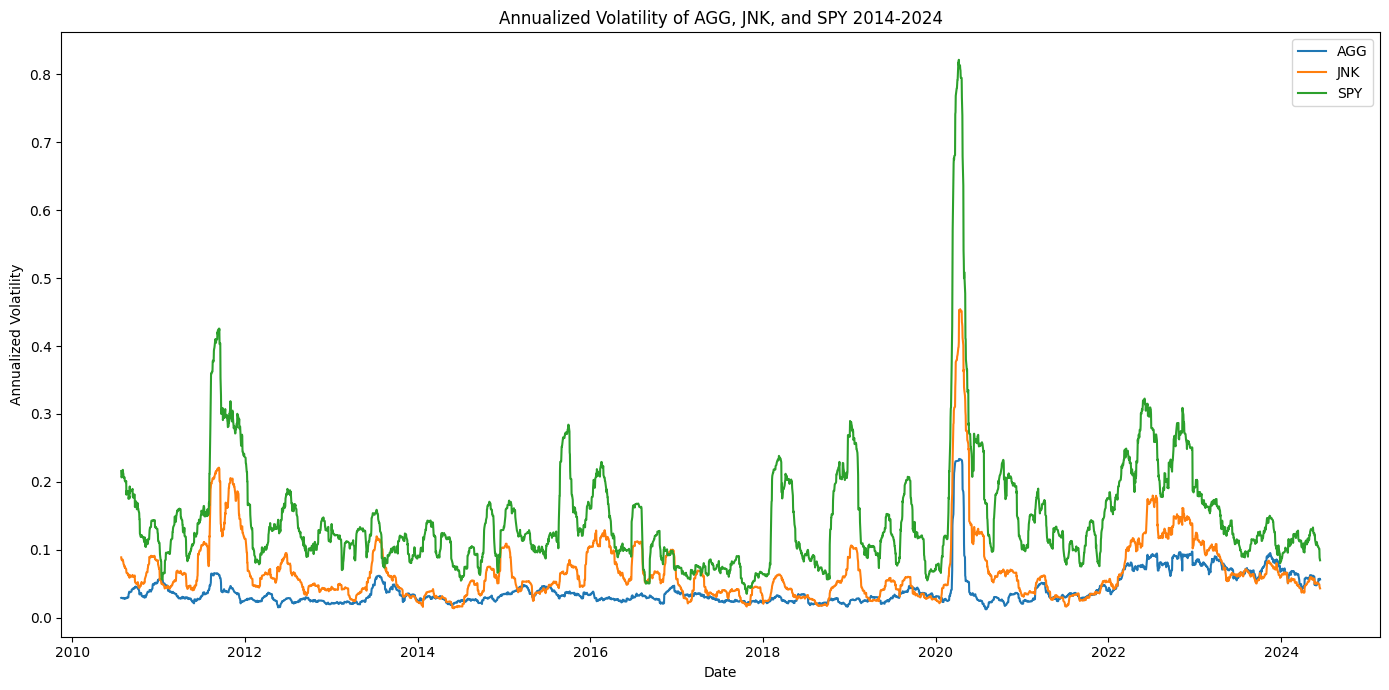

In [10]:
# calculate the annualized volatility for each etf
# calculate the annualized volatility for each etf with a 30-day rolling window
window_size = 30
agg['Volatility'] = agg['DailyReturn'].rolling(window=window_size).std() * np.sqrt(252)
jnk['Volatility'] = jnk['DailyReturn'].rolling(window=window_size).std() * np.sqrt(252)
spy['Volatility'] = spy['DailyReturn'].rolling(window=window_size).std() * np.sqrt(252)

# Plotting the annualized volatility
plt.figure(figsize=(14, 7))

plt.plot(agg['Date'], agg['Volatility'], label='AGG')
plt.plot(jnk['Date'], jnk['Volatility'], label='JNK')
plt.plot(spy['Date'], spy['Volatility'], label='SPY')

plt.title('Annualized Volatility of AGG, JNK, and SPY 2014-2024')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# Calculate the cumulative maximum of the adjusted close prices
agg['CumulativeMax'] = agg['Adj Close'].cummax()
jnk['CumulativeMax'] = jnk['Adj Close'].cummax()
spy['CumulativeMax'] = spy['Adj Close'].cummax()

# Calculate the drawdown
agg['Drawdown'] = (agg['Adj Close'] - agg['CumulativeMax']) / agg['CumulativeMax']
jnk['Drawdown'] = (jnk['Adj Close'] - jnk['CumulativeMax']) / jnk['CumulativeMax']
spy['Drawdown'] = (spy['Adj Close'] - spy['CumulativeMax']) / spy['CumulativeMax']

# Calculate the maximum drawdown
agg_max_drawdown = agg['Drawdown'].min()
jnk_max_drawdown = jnk['Drawdown'].min()
spy_max_drawdown = spy['Drawdown'].min()

agg_max_drawdown_date = agg['Date'][agg['Drawdown'].idxmin()].strftime('%Y-%m-%d')
jnk_max_drawdown_date = jnk['Date'][jnk['Drawdown'].idxmin()].strftime('%Y-%m-%d')
spy_max_drawdown_date = spy['Date'][spy['Drawdown'].idxmin()].strftime('%Y-%m-%d')

print(f"AGG Max Drawdown: {agg_max_drawdown:.2%}   Date: {agg_max_drawdown_date}")
print(f"JNK Max Drawdown: {jnk_max_drawdown:.2%}   Date: {jnk_max_drawdown_date}")
print(f"SPY Max Drawdown: {spy_max_drawdown:.2%}   Date: {spy_max_drawdown_date}")

AGG Max Drawdown: -18.43%   Date: 2022-10-20
JNK Max Drawdown: -22.89%   Date: 2020-03-23
SPY Max Drawdown: -33.72%   Date: 2020-03-23


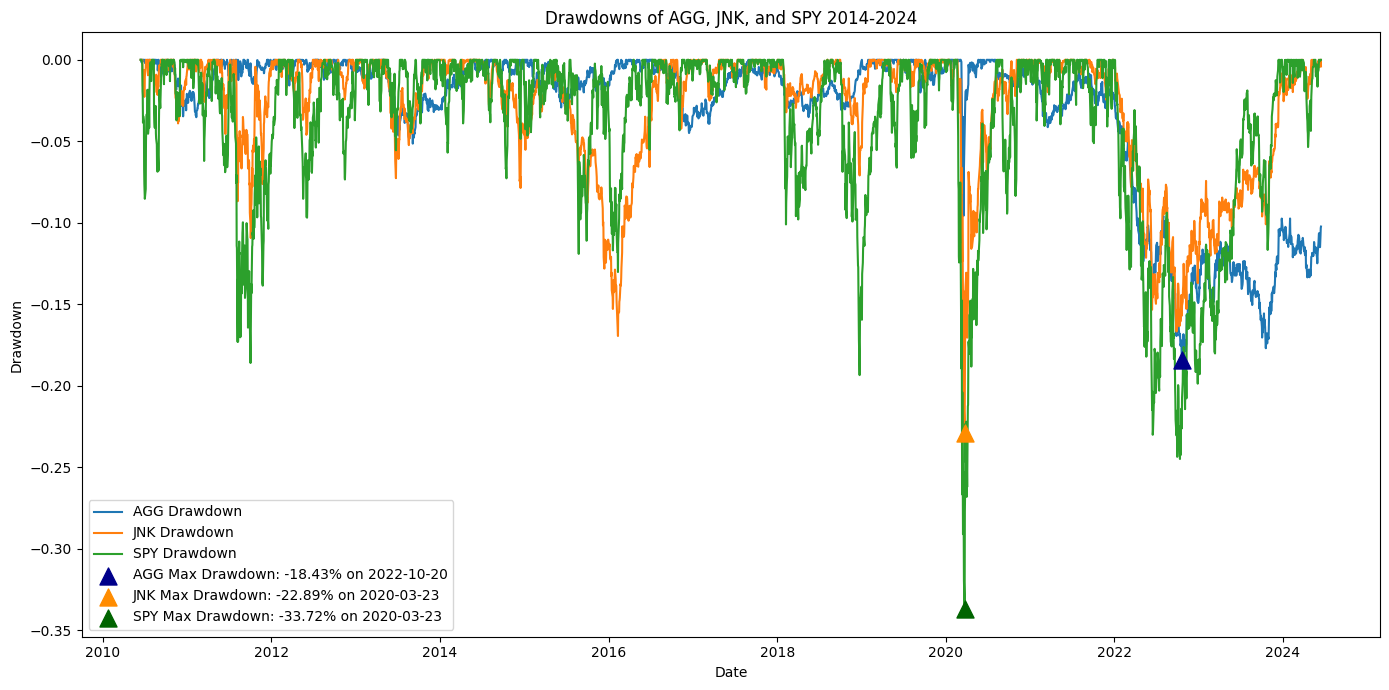

In [12]:
# Plotting the drawdowns
plt.figure(figsize=(14, 7))

agg_max_drawdown_date = pd.to_datetime(agg['Date'][agg['Drawdown'].idxmin()])
jnk_max_drawdown_date = pd.to_datetime(jnk['Date'][jnk['Drawdown'].idxmin()])
spy_max_drawdown_date = pd.to_datetime(spy['Date'][spy['Drawdown'].idxmin()])

plt.plot(agg['Date'], agg['Drawdown'], label='AGG Drawdown')
plt.plot(jnk['Date'], jnk['Drawdown'], label='JNK Drawdown')
plt.plot(spy['Date'], spy['Drawdown'], label='SPY Drawdown')

# Add distinguishable markers for max drawdowns
plt.scatter(agg_max_drawdown_date, agg_max_drawdown, color='darkblue', marker='^', s=150, zorder=5, label=f'AGG Max Drawdown: {agg_max_drawdown:.2%} on {agg_max_drawdown_date.strftime("%Y-%m-%d")}')
plt.scatter(jnk_max_drawdown_date, jnk_max_drawdown, color='darkorange', marker='^', s=150, zorder=5, label=f'JNK Max Drawdown: {jnk_max_drawdown:.2%} on {jnk_max_drawdown_date.strftime("%Y-%m-%d")}')
plt.scatter(spy_max_drawdown_date, spy_max_drawdown, color='darkgreen', marker='^', s=150, zorder=5, label=f'SPY Max Drawdown: {spy_max_drawdown:.2%} on {spy_max_drawdown_date.strftime("%Y-%m-%d")}')

plt.title('Drawdowns of AGG, JNK, and SPY 2014-2024')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
agg['Drawdown'].loc[agg['Date'] == jnk_max_drawdown_date]

3979   -0.04429
Name: Drawdown, dtype: float64

The drawdown in the 2008-2009 financial crisis also showed the resilience on the bond performance to offset the severe market conditions.

Most Recent MaxDraw down in recent 10 years: On March 23, 2020, both JNK (High-Yield Bonds) and SPY (S&P 500) experienced their maximum drawdowns, recording declines of -22.89% and -33.72%, respectively. In contrast, AGG (Investment-Grade Bonds) exhibited a drawdown of only -4.4% on the same date. This disparity underscores the resilience and risk mitigation capabilities of investment-grade bonds in cushioning against market volatility, thereby providing a stabilizing effect during periods of significant equity market downturns.

In [14]:
# # Calculate the correlation matrix for daily returns
# returns = pd.DataFrame({
#     'AGG': agg['DailyReturn'],
#     'JNK': jnk['DailyReturn'],
#     'SPY': spy['DailyReturn']
# })

# returns_corr = returns.corr()
# print("Correlation of Daily Returns:")
# print(returns_corr)


# # Calculate the correlation matrix for volatility
# volatility = pd.DataFrame({
#     'AGG': agg['Volatility'],
#     'JNK': jnk['Volatility'],
#     'SPY': spy['Volatility']
# })

# volatility_corr = volatility.corr()
# print("Correlation of Volatility:")
# print(volatility_corr)

Compare the performance of portfolios with different allocations to equities, high-yield bonds, and investment-grade bonds, particularly focusing on how they perform during market upsides and downsides.

To align with your hypothesis, you should consider the following:
1. Upside Performance: A portfolio with a higher allocation to equities should benefit more during market upswings.
2. Downside Protection: A portfolio with a higher allocation to investment-grade bonds should provide better protection during market downturns compared to high-yield bonds.

In [15]:
# Simple Tryout not logical, but the result make sense

# Define portfolio allocations
allocations_A = {'Equities': 0.10, 'HighYieldBonds': 0.4, 'InvGradeBonds': 0.5}
allocations_B = {'Equities': 0.10, 'HighYieldBonds': 0.0, 'InvGradeBonds': 0.9}
allocations_C = {'Equities': 0.15, 'HighYieldBonds': 0.0, 'InvGradeBonds': 0.85}
allocations_D = {'Equities': 0.15, 'HighYieldBonds': 0.35, 'InvGradeBonds': 0.5}

In [16]:
# portfolio_return_A = (allocations_A['Equities'] * spy['DailyReturn'].mean() + allocations_A['HighYieldBonds'] * jnk['DailyReturn'].mean() + allocations_A['InvGradeBonds'] * agg['DailyReturn'].mean()) * 252
# portfolio_return_B = (allocations_B['Equities'] * spy['DailyReturn'].mean() + allocations_B['HighYieldBonds'] * jnk['DailyReturn'].mean() + allocations_B['InvGradeBonds'] * agg['DailyReturn'].mean()) * 252
# portfolio_return_C = (allocations_C['Equities'] * spy['DailyReturn'].mean() + allocations_C['HighYieldBonds'] * jnk['DailyReturn'].mean() + allocations_C['InvGradeBonds'] * agg['DailyReturn'].mean()) * 252
# portfolio_return_D = (allocations_D['Equities'] * spy['DailyReturn'].mean() + allocations_D['HighYieldBonds'] * jnk['DailyReturn'].mean() + allocations_D['InvGradeBonds'] * agg['DailyReturn'].mean()) * 252
# # portfolio_return_E = (allocations_E['Equities'] * spy['DailyReturn'].mean() + allocations_E['HighYieldBonds'] * jnk['DailyReturn'].mean() + allocations_E['InvGradeBonds'] * agg['DailyReturn'].mean()) * 252
# # portfolio_return_F = (allocations_F['Equities'] * spy['DailyReturn'].mean() + allocations_F['HighYieldBonds'] * jnk['DailyReturn'].mean() + allocations_F['InvGradeBonds'] * agg['DailyReturn'].mean()) * 252


# print(f"Portfolio A Return: {portfolio_return_A:.2%}")
# print(f"Portfolio B Return: {portfolio_return_B:.2%}")
# print(f"Portfolio C Return: {portfolio_return_C:.2%}")
# print(f"Portfolio D Return: {portfolio_return_D:.2%}")
# # print(f"Portfolio E Return: {portfolio_return_E:.2%}")
# # print(f"Portfolio F Return: {portfolio_return_F:.2%}")

In [17]:
# Create a DataFrame using the allocation variables
allocations_df = pd.DataFrame({
    'Asset': ['Equities', 'HighYieldBonds', 'InvGradeBonds'],
    'ETFs': ['SPY', 'JNK', 'AGG'],
    'Allocation_A': [allocations_A['Equities'], allocations_A['HighYieldBonds'], allocations_A['InvGradeBonds']],
    'Allocation_B': [allocations_B['Equities'], allocations_B['HighYieldBonds'], allocations_B['InvGradeBonds']],
    'Allocation_C': [allocations_C['Equities'], allocations_C['HighYieldBonds'], allocations_C['InvGradeBonds']],
    'Allocation_D': [allocations_D['Equities'], allocations_D['HighYieldBonds'], allocations_D['InvGradeBonds']]
})

In [18]:
allocations_df

,Asset,ETFs,Allocation_A,Allocation_B,Allocation_C,Allocation_D
0,Equities,SPY,0.1,0.1,0.15,0.15
1,HighYieldBonds,JNK,0.4,0.0,0.00,0.35
2,InvGradeBonds,AGG,0.5,0.9,0.85,0.50


Buy and Hold with Initial Asset Allocation

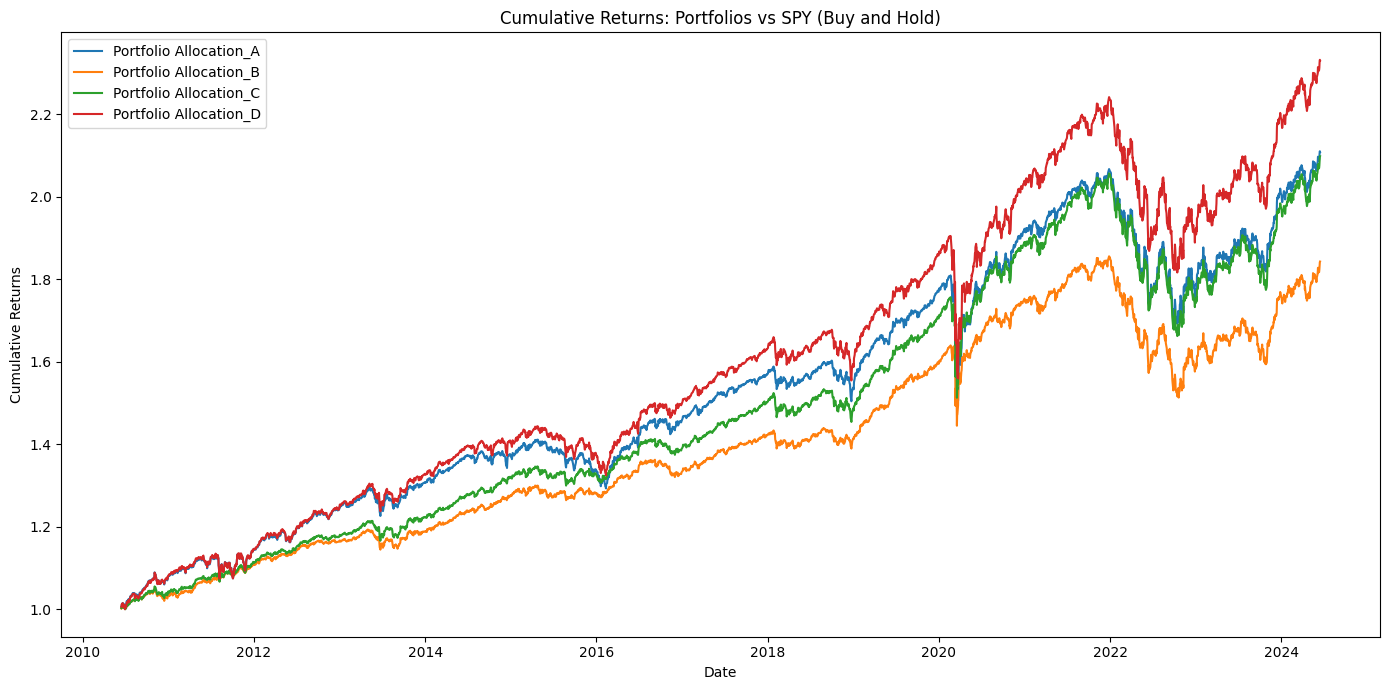

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function with SPY as benchmark for buy-and-hold strategy
def backtest_portfolios_buy_and_hold(allocations_df, backtest_start_date, backtest_end_date):
    cumulative_product_dict = {}

    for allocation_name in allocations_df.columns[2:]:  # Skip 'Asset' and 'ETFs' columns
        # Extract the allocation values from allocations_df
        allocations = {
            'Equities': allocations_df.loc[allocations_df['Asset'] == 'Equities', allocation_name].values[0],
            'HighYieldBonds': allocations_df.loc[allocations_df['Asset'] == 'HighYieldBonds', allocation_name].values[0],
            'InvGradeBonds': allocations_df.loc[allocations_df['Asset'] == 'InvGradeBonds', allocation_name].values[0]
        }

        # Filter the data for the backtest period
        agg_backtest = agg[(agg['Date'] >= backtest_start_date) & (agg['Date'] <= backtest_end_date)].set_index('Date')
        jnk_backtest = jnk[(jnk['Date'] >= backtest_start_date) & (jnk['Date'] <= backtest_end_date)].set_index('Date')
        spy_backtest = spy[(spy['Date'] >= backtest_start_date) & (spy['Date'] <= backtest_end_date)].set_index('Date')

        # Align the indices
        combined_index = agg_backtest.index.intersection(jnk_backtest.index).intersection(spy_backtest.index)
        agg_backtest = agg_backtest.loc[combined_index]
        jnk_backtest = jnk_backtest.loc[combined_index]
        spy_backtest = spy_backtest.loc[combined_index]

        # Calculate cumulative returns for each asset
        agg_cum_returns = (1 + agg_backtest['DailyReturn']).cumprod()
        jnk_cum_returns = (1 + jnk_backtest['DailyReturn']).cumprod()
        spy_cum_returns = (1 + spy_backtest['DailyReturn']).cumprod()

        # Calculate portfolio cumulative returns based on initial allocation
        portfolio_cumulative_product = (
            allocations['Equities'] * spy_cum_returns +
            allocations['HighYieldBonds'] * jnk_cum_returns +
            allocations['InvGradeBonds'] * agg_cum_returns
        )
        cumulative_product_dict[allocation_name] = portfolio_cumulative_product

    # Plot all cumulative returns on the same plot
    plt.figure(figsize=(14, 7))
    for allocation_name, cumulative_product in cumulative_product_dict.items():
        plt.plot(combined_index, cumulative_product, label=f'Portfolio {allocation_name}')
    #plt.plot(combined_index, (1 + spy_backtest['DailyReturn']).cumprod(), label='SPY (Benchmark)', color='green')
    plt.title('Cumulative Returns: Portfolios vs SPY (Buy and Hold)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return cumulative_product_dict

# Call the function and print the results
buy_hold_dict = backtest_portfolios_buy_and_hold(allocations_df, start_date, end_date)

In [20]:
def calculate_performance_metrics(cumulative_product):
    end_return = cumulative_product.iloc[-1] - 1
    daily_returns = cumulative_product.pct_change().dropna()
    annualized_return = np.mean(daily_returns) * 252
    annualized_volatility = np.std(daily_returns) * np.sqrt(252)
    sharpe_ratio = annualized_return / annualized_volatility
    running_max = cumulative_product.cummax()
    drawdown = (cumulative_product - running_max) / running_max
    max_drawdown = drawdown.min()
    max_drawdown_date = drawdown.idxmin().strftime("%Y-%m-%d")
    
    return end_return, annualized_return, annualized_volatility, sharpe_ratio, max_drawdown, max_drawdown_date

In [21]:
# Iterate over each allocation's returns and calculate performance metrics
performance_metrics = {}
for allocation_name, returns in buy_hold_dict.items():
    performance_metrics[allocation_name] = calculate_performance_metrics(returns)

# Convert the performance metrics dictionary to a DataFrame
performance_df = pd.DataFrame(performance_metrics, index=['Total Return', 'Annualized Return', 'Annualized Volatility', 'Sharpe Ratio', 'Max Drawdown', 'Max Drawdown Date']).T

# Print the DataFrame
performance_df

,Total Return,Annualized Return,Annualized Volatility,Sharpe Ratio,Max Drawdown,Max Drawdown Date
Allocation_A,1.108599,0.055096,0.066143,0.832977,-0.181302,2022-10-14
Allocation_B,0.843363,0.044948,0.052299,0.859444,-0.184523,2022-10-20
Allocation_C,1.098752,0.054582,0.060031,0.909227,-0.191654,2022-10-14
Allocation_D,1.330833,0.062687,0.072872,0.860235,-0.189623,2022-10-14


I think what about is right. Even though there is not initial capital involved but since it is a buy and hold position, we do not need to worry about the number of shares in our position, we just want to comparing if holding a bit more equity by replacing the high-yield bond would provided better metric.
The result shows an approximately 20% more excess return in the Allocation D than A, and with a bit higher annualized return and  share ratios. While higher return comes with higher risk, ALlocation D has relatively higher annualized volatility and higher max drawdown. 

In [22]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Function with SPY as benchmark

# def backtest_portfolios(allocations_df, backtest_start_date, backtest_end_date):
#     cumulative_product_dict = {}

#     for allocation_name in allocations_df.columns[2:]:  # Skip 'Asset' and 'ETFs' columns
#         # Extract the allocation values from allocations_df
#         allocations = {
#             'Equities': allocations_df.loc[allocations_df['Asset'] == 'Equities', allocation_name].values[0],
#             'HighYieldBonds': allocations_df.loc[allocations_df['Asset'] == 'HighYieldBonds', allocation_name].values[0],
#             'InvGradeBonds': allocations_df.loc[allocations_df['Asset'] == 'InvGradeBonds', allocation_name].values[0]
#         }

#         # Filter the data for the backtest period
#         agg_backtest = agg[(agg['Date'] >= backtest_start_date) & (agg['Date'] <= backtest_end_date)].set_index('Date')
#         jnk_backtest = jnk[(jnk['Date'] >= backtest_start_date) & (jnk['Date'] <= backtest_end_date)].set_index('Date')
#         spy_backtest = spy[(spy['Date'] >= backtest_start_date) & (spy['Date'] <= backtest_end_date)].set_index('Date')

#         # Align the indices
#         combined_index = agg_backtest.index.intersection(jnk_backtest.index).intersection(spy_backtest.index)
#         agg_backtest = agg_backtest.loc[combined_index]
#         jnk_backtest = jnk_backtest.loc[combined_index]
#         spy_backtest = spy_backtest.loc[combined_index]

#         # Calculate portfolio daily returns
#         portfolio_daily_returns = (
#             allocations['Equities'] * spy_backtest['DailyReturn'] +
#             allocations['HighYieldBonds'] * jnk_backtest['DailyReturn'] +
#             allocations['InvGradeBonds'] * agg_backtest['DailyReturn']
#         )

#         # Compute cumulative returns
#         portfolio_cumulative_product = (1 + portfolio_daily_returns).cumprod()
#         cumulative_product_dict[allocation_name] = portfolio_cumulative_product

#     # Plot all cumulative returns on the same plot
#     plt.figure(figsize=(14, 7))
#     for allocation_name, cumulative_product in cumulative_product_dict.items():
#         plt.plot(combined_index, cumulative_product, label=f'Portfolio {allocation_name}')
#     plt.plot(combined_index, (1 + spy_backtest['DailyReturn']).cumprod(), label='SPY (Benchmark)', color='green')
#     plt.title('Cumulative Returns: Portfolios vs SPY')
#     plt.xlabel('Date')
#     plt.ylabel('Cumulative Returns')
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

#     return cumulative_product_dict

# # Call the function and print the results
# cumulative_product_dict = backtest_portfolios(allocations_df, start_date, end_date)

In [23]:
# this basically daily rebalancing, fixed allocation

def backtest_portfolios(allocations_df, backtest_start_date, backtest_end_date):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    cumulative_product_dict = {}
    portfolio_daily_returns_dict = {}

    for allocation_name in allocations_df.columns[2:]:  # Skip 'Asset' and 'ETFs' columns
        # Extract the allocation values from allocations_df
        allocations = {
            'Equities': allocations_df.loc[allocations_df['Asset'] == 'Equities', allocation_name].values[0],
            'HighYieldBonds': allocations_df.loc[allocations_df['Asset'] == 'HighYieldBonds', allocation_name].values[0],
            'InvGradeBonds': allocations_df.loc[allocations_df['Asset'] == 'InvGradeBonds', allocation_name].values[0]
        }

        # Filter the data for the backtest period
        agg_backtest = agg[(agg['Date'] >= backtest_start_date) & (agg['Date'] <= backtest_end_date)].set_index('Date')
        jnk_backtest = jnk[(jnk['Date'] >= backtest_start_date) & (jnk['Date'] <= backtest_end_date)].set_index('Date')
        spy_backtest = spy[(spy['Date'] >= backtest_start_date) & (spy['Date'] <= backtest_end_date)].set_index('Date')

        # Align the indices
        combined_index = agg_backtest.index.intersection(jnk_backtest.index).intersection(spy_backtest.index)
        agg_backtest = agg_backtest.loc[combined_index]
        jnk_backtest = jnk_backtest.loc[combined_index]
        spy_backtest = spy_backtest.loc[combined_index]

        # Calculate portfolio daily returns
        portfolio_daily_returns = (
            allocations['Equities'] * spy_backtest['DailyReturn'] +
            allocations['HighYieldBonds'] * jnk_backtest['DailyReturn'] +
            allocations['InvGradeBonds'] * agg_backtest['DailyReturn']
        )

        # Compute cumulative returns
        portfolio_cumulative_product = (1 + portfolio_daily_returns).cumprod()
        cumulative_product_dict[allocation_name] = portfolio_cumulative_product
        
        portfolio_daily_returns_dict[allocation_name] = portfolio_daily_returns
        

    # Plot all cumulative returns on the same plot
    plt.figure(figsize=(14, 7))
    for allocation_name, cumulative_product in cumulative_product_dict.items():
        plt.plot(combined_index, cumulative_product, label=f'Portfolio {allocation_name}')
    plt.title('Cumulative Growth: Portfolios with different allocation for Equity, Investment-level Bonds, High-Yield Bonds')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Growth')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return  portfolio_daily_returns_dict

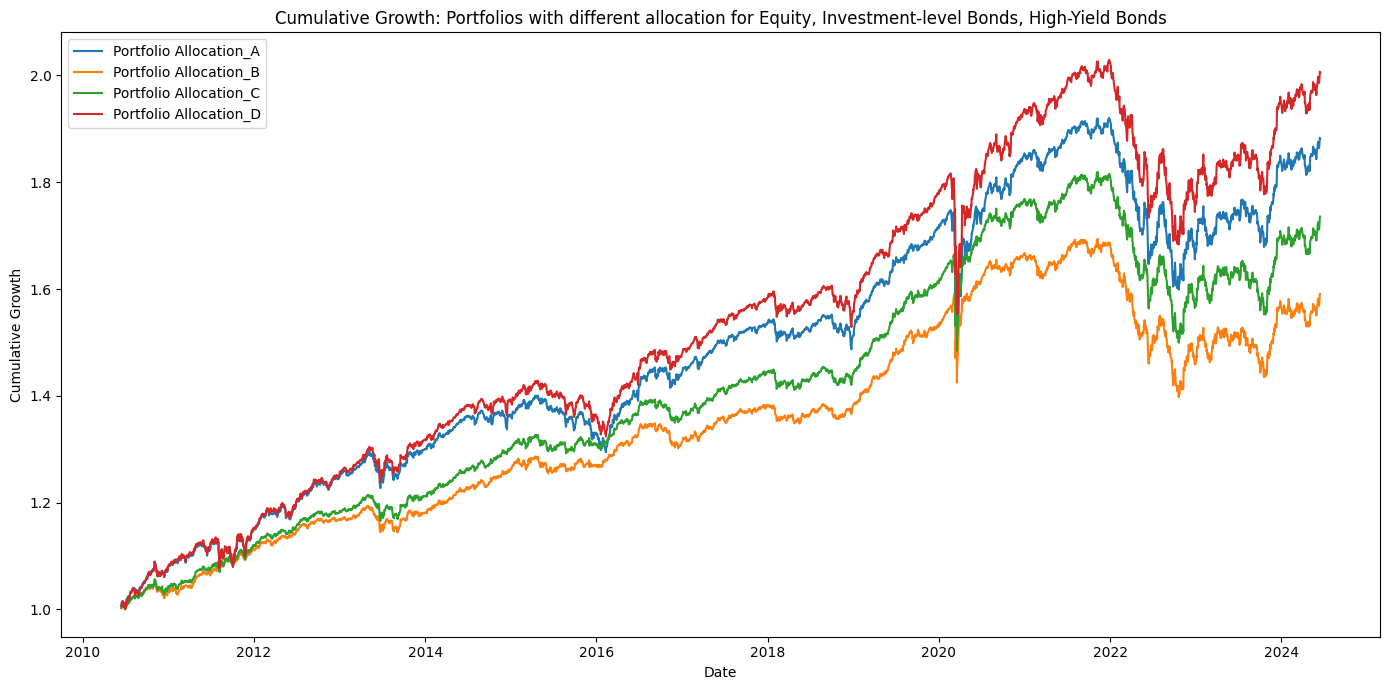

In [24]:
# Call the function and print the results
portfolio_daily_returns_dict = backtest_portfolios(allocations_df, start_date, end_date)

With Daily Rebalance

In [25]:
def calculate_performance_metrics(returns):
    cumulative_product = (1 + returns).cumprod()
    end_return = cumulative_product.iloc[-1] - 1
    annualized_return = np.mean(returns) * 252
    annualized_volatility = np.std(returns) * np.sqrt(252)
    sharpe_ratio = annualized_return / annualized_volatility
    running_max = cumulative_product.cummax()
    drawdown = (cumulative_product - running_max) / running_max
    max_drawdown = drawdown.min()
    max_drawdown_date = drawdown.idxmin().strftime("%Y-%m-%d")
    
    return end_return, annualized_return, annualized_volatility, sharpe_ratio, max_drawdown, max_drawdown_date

In [26]:
# Iterate over each allocation's returns and calculate performance metrics
performance_metrics = {}
for allocation_name, returns in portfolio_daily_returns_dict.items():
    performance_metrics[allocation_name] = calculate_performance_metrics(returns)

# Convert the performance metrics dictionary to a DataFrame
performance_df = pd.DataFrame(performance_metrics, index=['Total Return', 'Annualized Return', 'Annualized Volatility', 'Sharpe Ratio', 'Max Drawdown', 'Max Drawdown Date']).T

# Print the DataFrame
performance_df

,Total Return,Annualized Return,Annualized Volatility,Sharpe Ratio,Max Drawdown,Max Drawdown Date
Allocation_A,0.881095,0.046797,0.056913,0.822259,-0.167336,2022-10-20
Allocation_B,0.591075,0.034279,0.046327,0.739935,-0.174679,2022-10-20
Allocation_C,0.735706,0.040585,0.048134,0.843179,-0.175614,2022-10-20
Allocation_D,1.005418,0.051539,0.05974,0.86272,-0.170367,2022-10-20


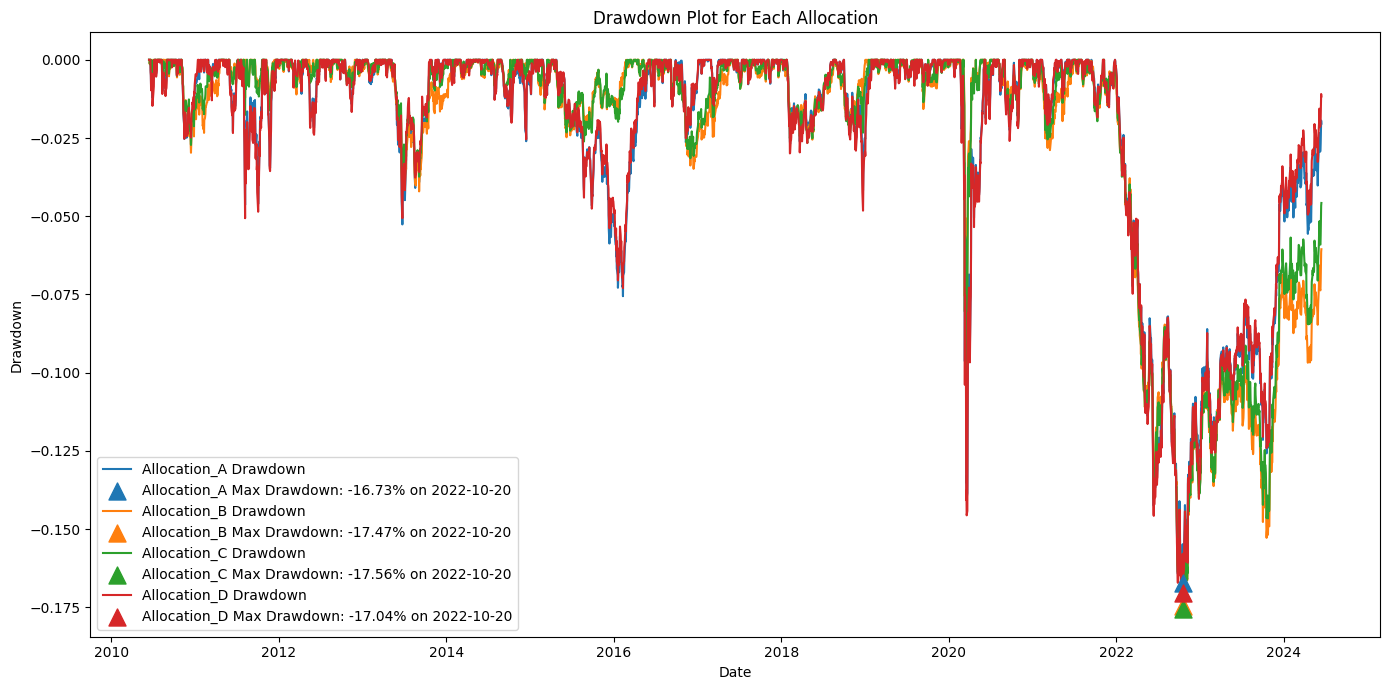

In [27]:
def drawdownplot(returns):
    cumulative_product = (1 + returns).cumprod()
    running_max = cumulative_product.cummax()
    drawdown = (cumulative_product - running_max) / running_max
    max_drawdown = drawdown.min()
    max_drawdown_date = drawdown.idxmin()
    
    return drawdown, max_drawdown, max_drawdown_date

# Plot the drawdown plot for each allocation
plt.figure(figsize=(14, 7))

for allocation_name, returns in portfolio_daily_returns_dict.items():
    drawdown, max_drawdown, max_drawdown_date = drawdownplot(returns)
    plt.plot(drawdown, label=f'{allocation_name} Drawdown')
    plt.scatter(max_drawdown_date, max_drawdown, marker='^', s=150, zorder=5, label=f'{allocation_name} Max Drawdown: {max_drawdown:.2%} on {max_drawdown_date.strftime("%Y-%m-%d")}')

plt.title('Drawdown Plot for Each Allocation')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.tight_layout()
plt.show()

With Rebalancing every 6 month

In [28]:
# def backtest_portfolios_with_rebalancing(allocations_df, backtest_start_date, backtest_end_date, rebalance_interval='6ME'):
#     import pandas as pd
#     import numpy as np
#     import matplotlib.pyplot as plt

#     cumulative_product_dict = {}
#     portfolio_daily_returns_dict = {}

#     for allocation_name in allocations_df.columns[2:]:  # Skip 'Asset' and 'ETFs' columns
#         # Extract the allocation values from allocations_df
#         allocations = {
#             'Equities': allocations_df.loc[allocations_df['Asset'] == 'Equities', allocation_name].values[0],
#             'HighYieldBonds': allocations_df.loc[allocations_df['Asset'] == 'HighYieldBonds', allocation_name].values[0],
#             'InvGradeBonds': allocations_df.loc[allocations_df['Asset'] == 'InvGradeBonds', allocation_name].values[0]
#         }

#         # Filter the data for the backtest period
#         agg_backtest = agg[(agg['Date'] >= backtest_start_date) & (agg['Date'] <= backtest_end_date)].set_index('Date')
#         jnk_backtest = jnk[(jnk['Date'] >= backtest_start_date) & (jnk['Date'] <= backtest_end_date)].set_index('Date')
#         spy_backtest = spy[(spy['Date'] >= backtest_start_date) & (spy['Date'] <= backtest_end_date)].set_index('Date')

#         # Align the indices
#         combined_index = agg_backtest.index.intersection(jnk_backtest.index).intersection(spy_backtest.index)
#         agg_backtest = agg_backtest.loc[combined_index]
#         jnk_backtest = jnk_backtest.loc[combined_index]
#         spy_backtest = spy_backtest.loc[combined_index]

#         # Initialize portfolio value and daily returns
#         portfolio_value = 1.0
#         portfolio_daily_returns = []

#         # Rebalance dates
#         rebalance_dates = pd.date_range(start=backtest_start_date, end=backtest_end_date, freq=rebalance_interval)

#         for date in combined_index:
#             if date in rebalance_dates:
#                 # Rebalance the portfolio
#                 portfolio_value = portfolio_value * (1 + np.sum(portfolio_daily_returns))
#                 portfolio_daily_returns = []

#             # Calculate daily return
#             daily_return = (
#                 allocations['Equities'] * spy_backtest.loc[date, 'DailyReturn'] +
#                 allocations['HighYieldBonds'] * jnk_backtest.loc[date, 'DailyReturn'] +
#                 allocations['InvGradeBonds'] * agg_backtest.loc[date, 'DailyReturn']
#             )
#             portfolio_daily_returns.append(daily_return)

#         # Compute cumulative returns
#         portfolio_cumulative_product = (1 + pd.Series(portfolio_daily_returns)).cumprod()
#         cumulative_product_dict[allocation_name] = portfolio_cumulative_product
        
#         portfolio_daily_returns_dict[allocation_name] = pd.Series(portfolio_daily_returns, index=combined_index[:len(portfolio_daily_returns)])
        
#     # Plot all cumulative returns on the same plot
#     plt.figure(figsize=(14, 7))
#     for allocation_name, cumulative_product in cumulative_product_dict.items():
#         plt.plot(combined_index[:len(cumulative_product)], cumulative_product, label=f'Portfolio {allocation_name}')
#     plt.title('Cumulative Growth: Portfolios with different allocation for Equity, Investment-level Bonds, High-Yield Bonds')
#     plt.xlabel('Date')
#     plt.ylabel('Cumulative Growth')
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

#     return portfolio_daily_returns_dict

# # Call the function and print the results
# reb_portfolio_daily_returns_dict = backtest_portfolios_with_rebalancing(allocations_df, start_date, end_date)

In [29]:
# def backtest_portfolios_with_rebalancing(allocations_df, backtest_start_date, backtest_end_date, rebalance_interval='6ME'):
#     import pandas as pd
#     import numpy as np
#     import matplotlib.pyplot as plt

#     cumulative_product_dict = {}
#     portfolio_daily_returns_dict = {}

#     for allocation_name in allocations_df.columns[2:]:  # Skip 'Asset' and 'ETFs' columns
#         # Extract the allocation values from allocations_df
#         allocations = {
#             'Equities': allocations_df.loc[allocations_df['Asset'] == 'Equities', allocation_name].values[0],
#             'HighYieldBonds': allocations_df.loc[allocations_df['Asset'] == 'HighYieldBonds', allocation_name].values[0],
#             'InvGradeBonds': allocations_df.loc[allocations_df['Asset'] == 'InvGradeBonds', allocation_name].values[0]
#         }

#         # Filter the data for the backtest period
#         agg_backtest = agg[(agg['Date'] >= backtest_start_date) & (agg['Date'] <= backtest_end_date)].set_index('Date')
#         jnk_backtest = jnk[(jnk['Date'] >= backtest_start_date) & (jnk['Date'] <= backtest_end_date)].set_index('Date')
#         spy_backtest = spy[(spy['Date'] >= backtest_start_date) & (spy['Date'] <= backtest_end_date)].set_index('Date')

#         # Align the indices
#         combined_index = agg_backtest.index.intersection(jnk_backtest.index).intersection(spy_backtest.index)
#         agg_backtest = agg_backtest.loc[combined_index]
#         jnk_backtest = jnk_backtest.loc[combined_index]
#         spy_backtest = spy_backtest.loc[combined_index]

#         # Initialize portfolio value and daily returns
#         portfolio_value = 1.0
#         portfolio_daily_returns = []

#         # Rebalance dates
#         rebalance_dates = pd.date_range(start=backtest_start_date, end=backtest_end_date, freq=rebalance_interval)

#         for date in combined_index:
#             if date in rebalance_dates:
#                 # Rebalance the portfolio
#                 portfolio_value = portfolio_value * (1 + np.sum(portfolio_daily_returns))
#                 portfolio_daily_returns = []

#             # Calculate daily return
#             daily_return = (
#                 allocations['Equities'] * spy_backtest.loc[date, 'DailyReturn'] +
#                 allocations['HighYieldBonds'] * jnk_backtest.loc[date, 'DailyReturn'] +
#                 allocations['InvGradeBonds'] * agg_backtest.loc[date, 'DailyReturn']
#             )
#             portfolio_daily_returns.append(daily_return)

#         # Compute cumulative returns
#         portfolio_cumulative_product = (1 + pd.Series(portfolio_daily_returns)).cumprod()
#         cumulative_product_dict[allocation_name] = portfolio_cumulative_product
        
#         portfolio_daily_returns_dict[allocation_name] = pd.Series(portfolio_daily_returns, index=combined_index[:len(portfolio_daily_returns)])
        
#     # Plot all cumulative returns on the same plot
#     plt.figure(figsize=(14, 7))
#     for allocation_name, cumulative_product in cumulative_product_dict.items():
#         plt.plot(combined_index[:len(cumulative_product)], cumulative_product, label=f'Portfolio {allocation_name}')
#     plt.title('Cumulative Growth: Portfolios with different allocation for Equity, Investment-level Bonds, High-Yield Bonds')
#     plt.xlabel('Date')
#     plt.ylabel('Cumulative Growth')
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

#     return portfolio_daily_returns_dict

# # Call the function and print the results
# reb_portfolio_daily_returns_dict = backtest_portfolios_with_rebalancing(allocations_df, start_date, end_date)

In [30]:
allocations = {
            'Equities': allocations_df.loc[allocations_df['Asset'] == 'Equities', allocation_name].values[0],
            'HighYieldBonds': allocations_df.loc[allocations_df['Asset'] == 'HighYieldBonds', allocation_name].values[0],
            'InvGradeBonds': allocations_df.loc[allocations_df['Asset'] == 'InvGradeBonds', allocation_name].values[0]
        }

allocations 

{'Equities': 0.15, 'HighYieldBonds': 0.35, 'InvGradeBonds': 0.5}

In [31]:
backtest_start_date = start_date
backtest_end_date = end_date
rebalance_interval='6ME'

In [32]:
# Initial ratios for SPY and JNK
initial_ratio_spy = allocations['Equities'] / (allocations['Equities'] + allocations['HighYieldBonds'])
initial_ratio_jnk = allocations['HighYieldBonds'] / (allocations['Equities'] + allocations['HighYieldBonds'])

# Filter the data for the backtest period
agg_backtest = agg[(agg['Date'] >= backtest_start_date) & (agg['Date'] <= backtest_end_date)].set_index('Date')
jnk_backtest = jnk[(jnk['Date'] >= backtest_start_date) & (jnk['Date'] <= backtest_end_date)].set_index('Date')
spy_backtest = spy[(spy['Date'] >= backtest_start_date) & (spy['Date'] <= backtest_end_date)].set_index('Date')

# Align the indices
combined_index = agg_backtest.index.intersection(jnk_backtest.index).intersection(spy_backtest.index)
agg_backtest = agg_backtest.loc[combined_index]
jnk_backtest = jnk_backtest.loc[combined_index]
spy_backtest = spy_backtest.loc[combined_index]

# Initialize portfolio value and daily returns
portfolio_value = 1.0
portfolio_daily_returns = []

# Initialize component values
spy_value = allocations['Equities'] * portfolio_value
jnk_value = allocations['HighYieldBonds'] * portfolio_value
agg_value = allocations['InvGradeBonds'] * portfolio_value

# Rebalance dates
rebalance_dates = pd.date_range(start=backtest_start_date, end=backtest_end_date, freq=rebalance_interval)

agg_values_at_rebalance = {}

date = rebalance_dates.strftime('%Y-%m-%d')[0]

In [33]:
# Initial ratios for SPY and JNK
initial_ratio_spy = allocations['Equities'] / (allocations['Equities'] + allocations['HighYieldBonds'])
initial_ratio_jnk = allocations['HighYieldBonds'] / (allocations['Equities'] + allocations['HighYieldBonds'])

# Filter the data for the backtest period
agg_backtest = agg[(agg['Date'] >= backtest_start_date) & (agg['Date'] <= backtest_end_date)].set_index('Date')
jnk_backtest = jnk[(jnk['Date'] >= backtest_start_date) & (jnk['Date'] <= backtest_end_date)].set_index('Date')
spy_backtest = spy[(spy['Date'] >= backtest_start_date) & (spy['Date'] <= backtest_end_date)].set_index('Date')

# Align the indices
combined_index = agg_backtest.index.intersection(jnk_backtest.index).intersection(spy_backtest.index)
agg_backtest = agg_backtest.loc[combined_index]
jnk_backtest = jnk_backtest.loc[combined_index]
spy_backtest = spy_backtest.loc[combined_index]

spyperiod1 = spy_backtest.loc[start_date:rebalance_dates.strftime('%Y-%m-%d')[0], 'Adj Close']
aggperiod1 = agg_backtest.loc[start_date:rebalance_dates.strftime('%Y-%m-%d')[0], 'Adj Close']
jnkperiod1 = jnk_backtest.loc[start_date:rebalance_dates.strftime('%Y-%m-%d')[0], 'Adj Close']

In [34]:
import math

initial_balance = 1000000

# transaction_fee_rate = 0.001  # 0.1% transaction fee

# Calculate initial shares to hold (rounded down to the nearest whole number)
spy_initial_shares = math.floor((initial_balance * allocations['Equities']) / spy_backtest.loc[start_date, 'Adj Close'])
jnk_initial_shares = math.floor((initial_balance * allocations['HighYieldBonds']) / jnk_backtest.loc[start_date, 'Adj Close'])
agg_initial_shares = math.floor((initial_balance * allocations['InvGradeBonds']) / agg_backtest.loc[start_date, 'Adj Close'])


# # Calculate transaction fees
# spy_transaction_fee = spy_initial_shares * spy_backtest.loc[start_date, 'Adj Close'] * transaction_fee_rate
# jnk_transaction_fee = jnk_initial_shares * jnk_backtest.loc[start_date, 'Adj Close'] * transaction_fee_rate
# agg_transaction_fee = agg_initial_shares * agg_backtest.loc[start_date, 'Adj Close'] * transaction_fee_rate


# Calculate total cost
spy_total_cost = spy_initial_shares * spy_backtest.loc[start_date, 'Adj Close'] # + spy_transaction_fee
jnk_total_cost = jnk_initial_shares * jnk_backtest.loc[start_date, 'Adj Close'] # + jnk_transaction_fee
agg_total_cost = agg_initial_shares * agg_backtest.loc[start_date, 'Adj Close'] # + agg_transaction_fee

# Calculate remaining balance
remaining_balance = initial_balance - (spy_total_cost + jnk_total_cost + agg_total_cost)


# calculate the portfolio value at the rebalance date
# First rebalancing date
first_rebalance_date = rebalance_dates.strftime('%Y-%m-%d')[0]

# # Calculate the value of each component at the first rebalancing date
# spy_value_at_rebalance = spy_initial_shares * spy_backtest.loc[first_rebalance_date, 'Adj Close']
# jnk_value_at_rebalance = jnk_initial_shares * jnk_backtest.loc[first_rebalance_date, 'Adj Close']
# agg_value_at_rebalance = agg_initial_shares * agg_backtest.loc[first_rebalance_date, 'Adj Close']

# # Calculate total portfolio value at the first rebalancing date
# total_portfolio_value_at_rebalance = spy_value_at_rebalance + jnk_value_at_rebalance + agg_value_at_rebalance + remaining_balance

# spy_weight = spy_value_at_rebalance / total_portfolio_value_at_rebalance
# jnk_weight = jnk_value_at_rebalance / total_portfolio_value_at_rebalance
# agg_weight = agg_value_at_rebalance / total_portfolio_value_at_rebalance
# print(remaining_balance)

In [35]:
# # Calculate the value of each component at the first rebalancing date
# spy_value_at_rebalance = spy_initial_shares * spy_backtest.loc[first_rebalance_date, 'Adj Close']
# jnk_value_at_rebalance = jnk_initial_shares * jnk_backtest.loc[first_rebalance_date, 'Adj Close']
# agg_value_at_rebalance = agg_initial_shares * agg_backtest.loc[first_rebalance_date, 'Adj Close']

# # Calculate total portfolio value at the first rebalancing date
# total_portfolio_value_at_rebalance = spy_value_at_rebalance + jnk_value_at_rebalance + agg_value_at_rebalance + remaining_balance

# # Determine target values based on predetermined allocation
# target_spy_value = total_portfolio_value_at_rebalance * allocations['Equities']
# target_jnk_value = total_portfolio_value_at_rebalance * allocations['HighYieldBonds']
# target_agg_value = total_portfolio_value_at_rebalance * allocations['InvGradeBonds']

# # Sell excess positions first
# if spy_value_at_rebalance > target_spy_value:
#     excess_spy_value = spy_value_at_rebalance - target_spy_value
#     spy_shares_to_sell = math.floor(excess_spy_value / spy_backtest.loc[first_rebalance_date, 'Adj Close'])
#     spy_value_at_rebalance -= spy_shares_to_sell * spy_backtest.loc[first_rebalance_date, 'Adj Close']
#     remaining_balance += spy_shares_to_sell * spy_backtest.loc[first_rebalance_date, 'Adj Close']

# if jnk_value_at_rebalance > target_jnk_value:
#     excess_jnk_value = jnk_value_at_rebalance - target_jnk_value
#     jnk_shares_to_sell = math.floor(excess_jnk_value / jnk_backtest.loc[first_rebalance_date, 'Adj Close'])
#     jnk_value_at_rebalance -= jnk_shares_to_sell * jnk_backtest.loc[first_rebalance_date, 'Adj Close']
#     remaining_balance += jnk_shares_to_sell * jnk_backtest.loc[first_rebalance_date, 'Adj Close']

# if agg_value_at_rebalance > target_agg_value:
#     excess_agg_value = agg_value_at_rebalance - target_agg_value
#     agg_shares_to_sell = math.floor(excess_agg_value / agg_backtest.loc[first_rebalance_date, 'Adj Close'])
#     agg_value_at_rebalance -= agg_shares_to_sell * agg_backtest.loc[first_rebalance_date, 'Adj Close']
#     remaining_balance += agg_shares_to_sell * agg_backtest.loc[first_rebalance_date, 'Adj Close']

# # Buy positions to fill the lacked positions
# if spy_value_at_rebalance < target_spy_value:
#     lacked_spy_value = target_spy_value - spy_value_at_rebalance
#     spy_shares_to_buy = math.floor(lacked_spy_value / spy_backtest.loc[first_rebalance_date, 'Adj Close'])
#     spy_value_at_rebalance += spy_shares_to_buy * spy_backtest.loc[first_rebalance_date, 'Adj Close']
#     remaining_balance -= spy_shares_to_buy * spy_backtest.loc[first_rebalance_date, 'Adj Close']

# if jnk_value_at_rebalance < target_jnk_value:
#     lacked_jnk_value = target_jnk_value - jnk_value_at_rebalance
#     jnk_shares_to_buy = math.floor(lacked_jnk_value / jnk_backtest.loc[first_rebalance_date, 'Adj Close'])
#     jnk_value_at_rebalance += jnk_shares_to_buy * jnk_backtest.loc[first_rebalance_date, 'Adj Close']
#     remaining_balance -= jnk_shares_to_buy * jnk_backtest.loc[first_rebalance_date, 'Adj Close']

# if agg_value_at_rebalance < target_agg_value:
#     lacked_agg_value = target_agg_value - agg_value_at_rebalance
#     agg_shares_to_buy = math.floor(lacked_agg_value / agg_backtest.loc[first_rebalance_date, 'Adj Close'])
#     agg_value_at_rebalance += agg_shares_to_buy * agg_backtest.loc[first_rebalance_date, 'Adj Close']
#     remaining_balance -= agg_shares_to_buy * agg_backtest.loc[first_rebalance_date, 'Adj Close']

# # Calculate total portfolio value after rebalancing
# portfolio_value = spy_value_at_rebalance + jnk_value_at_rebalance + agg_value_at_rebalance + remaining_balance

# # Calculate weights after rebalancing
# spy_weight = spy_value_at_rebalance / portfolio_value
# jnk_weight = jnk_value_at_rebalance / portfolio_value
# agg_weight = agg_value_at_rebalance / portfolio_value

# # Print the weights after rebalancing
# print(f"SPY weight: {spy_weight}")
# print(f"JNK weight: {jnk_weight}")
# print(f"AGG weight: {agg_weight}")
# print(f"remaining_balance: {remaining_balance}")

The one below works!!!

In [36]:
# Calculate the value of each component at the first rebalancing date
spy_value_at_rebalance = spy_initial_shares * spy_backtest.loc[first_rebalance_date, 'Adj Close']
jnk_value_at_rebalance = jnk_initial_shares * jnk_backtest.loc[first_rebalance_date, 'Adj Close']
agg_value_at_rebalance = agg_initial_shares * agg_backtest.loc[first_rebalance_date, 'Adj Close']

# Calculate total portfolio value at the first rebalancing date
total_portfolio_value_at_rebalance = spy_value_at_rebalance + jnk_value_at_rebalance + agg_value_at_rebalance + remaining_balance

# Determine target values based on predetermined allocation
target_spy_value = total_portfolio_value_at_rebalance * allocations['Equities']
target_jnk_value = total_portfolio_value_at_rebalance * allocations['HighYieldBonds']
target_agg_value = total_portfolio_value_at_rebalance * allocations['InvGradeBonds']

# Sell excess positions first
if spy_value_at_rebalance > target_spy_value:
    excess_spy_value = spy_value_at_rebalance - target_spy_value
    spy_shares_to_sell = math.floor(excess_spy_value / spy_backtest.loc[first_rebalance_date, 'Adj Close'])
    spy_value_at_rebalance -= spy_shares_to_sell * spy_backtest.loc[first_rebalance_date, 'Adj Close']
    remaining_balance += spy_shares_to_sell * spy_backtest.loc[first_rebalance_date, 'Adj Close']

if jnk_value_at_rebalance > target_jnk_value:
    excess_jnk_value = jnk_value_at_rebalance - target_jnk_value
    jnk_shares_to_sell = math.floor(excess_jnk_value / jnk_backtest.loc[first_rebalance_date, 'Adj Close'])
    jnk_value_at_rebalance -= jnk_shares_to_sell * jnk_backtest.loc[first_rebalance_date, 'Adj Close']
    remaining_balance += jnk_shares_to_sell * jnk_backtest.loc[first_rebalance_date, 'Adj Close']

if agg_value_at_rebalance > target_agg_value:
    excess_agg_value = agg_value_at_rebalance - target_agg_value
    agg_shares_to_sell = math.floor(excess_agg_value / agg_backtest.loc[first_rebalance_date, 'Adj Close'])
    agg_value_at_rebalance -= agg_shares_to_sell * agg_backtest.loc[first_rebalance_date, 'Adj Close']
    remaining_balance += agg_shares_to_sell * agg_backtest.loc[first_rebalance_date, 'Adj Close']

# Define the iterative function to check balance and adjust shares to buy
def buy_shares_with_balance_check(value_at_rebalance, target_value, adj_close, remaining_balance):
    while value_at_rebalance < target_value and remaining_balance >= adj_close:
        lacked_value = target_value - value_at_rebalance
        shares_to_buy = min(math.floor(lacked_value / adj_close), math.floor(remaining_balance / adj_close))
        value_at_rebalance += shares_to_buy * adj_close
        remaining_balance -= shares_to_buy * adj_close
    return value_at_rebalance, remaining_balance

# Buy positions to fill the lacked positions
if spy_value_at_rebalance < target_spy_value:
    spy_value_at_rebalance, remaining_balance = buy_shares_with_balance_check(spy_value_at_rebalance, target_spy_value, spy_backtest.loc[first_rebalance_date, 'Adj Close'], remaining_balance)

if jnk_value_at_rebalance < target_jnk_value:
    jnk_value_at_rebalance, remaining_balance = buy_shares_with_balance_check(jnk_value_at_rebalance, target_jnk_value, jnk_backtest.loc[first_rebalance_date, 'Adj Close'], remaining_balance)

if agg_value_at_rebalance < target_agg_value:
    agg_value_at_rebalance, remaining_balance = buy_shares_with_balance_check(agg_value_at_rebalance, target_agg_value, agg_backtest.loc[first_rebalance_date, 'Adj Close'], remaining_balance)

# Calculate total portfolio value after rebalancing
portfolio_value = spy_value_at_rebalance + jnk_value_at_rebalance + agg_value_at_rebalance + remaining_balance

# Calculate weights after rebalancing
spy_weight = spy_value_at_rebalance / portfolio_value
jnk_weight = jnk_value_at_rebalance / portfolio_value
agg_weight = agg_value_at_rebalance / portfolio_value

In [37]:
# Print the weights after rebalancing
print(f"SPY weight: {spy_weight}")
print(f"JNK weight: {jnk_weight}")
print(f"AGG weight: {agg_weight}")
print(f"remaining_balance: {remaining_balance}")

SPY weight: 0.14989195549088916
JNK weight: 0.35002177922101285
AGG weight: 0.5000214561913121
remaining_balance: 64.84398600009536


In [38]:
# # Calculate the value of each component at the first rebalancing date
# spy_value_at_rebalance = spy_initial_shares * spy_backtest.loc[first_rebalance_date, 'Adj Close']
# jnk_value_at_rebalance = jnk_initial_shares * jnk_backtest.loc[first_rebalance_date, 'Adj Close']
# agg_value_at_rebalance = agg_initial_shares * agg_backtest.loc[first_rebalance_date, 'Adj Close']

# # Calculate total portfolio value at the first rebalancing date
# total_portfolio_value_at_rebalance = spy_value_at_rebalance + jnk_value_at_rebalance + agg_value_at_rebalance + remaining_balance

# # Determine target values based on predetermined allocation
# target_spy_value = total_portfolio_value_at_rebalance * allocations['Equities']
# target_jnk_value = total_portfolio_value_at_rebalance * allocations['HighYieldBonds']
# target_agg_value = total_portfolio_value_at_rebalance * allocations['InvGradeBonds']

# # Initialize counters for shares sold and bought
# spy_shares_sold = 0
# jnk_shares_sold = 0
# agg_shares_sold = 0
# spy_shares_bought = 0
# jnk_shares_bought = 0
# agg_shares_bought = 0

# # Sell excess positions first
# if spy_value_at_rebalance > target_spy_value:
#     excess_spy_value = spy_value_at_rebalance - target_spy_value
#     spy_shares_to_sell = math.floor(excess_spy_value / spy_backtest.loc[first_rebalance_date, 'Adj Close'])
#     spy_value_at_rebalance -= spy_shares_to_sell * spy_backtest.loc[first_rebalance_date, 'Adj Close']
#     remaining_balance += spy_shares_to_sell * spy_backtest.loc[first_rebalance_date, 'Adj Close']
#     spy_shares_sold += spy_shares_to_sell

# if jnk_value_at_rebalance > target_jnk_value:
#     excess_jnk_value = jnk_value_at_rebalance - target_jnk_value
#     jnk_shares_to_sell = math.floor(excess_jnk_value / jnk_backtest.loc[first_rebalance_date, 'Adj Close'])
#     jnk_value_at_rebalance -= jnk_shares_to_sell * jnk_backtest.loc[first_rebalance_date, 'Adj Close']
#     remaining_balance += jnk_shares_to_sell * jnk_backtest.loc[first_rebalance_date, 'Adj Close']
#     jnk_shares_sold += jnk_shares_to_sell

# if agg_value_at_rebalance > target_agg_value:
#     excess_agg_value = agg_value_at_rebalance - target_agg_value
#     agg_shares_to_sell = math.floor(excess_agg_value / agg_backtest.loc[first_rebalance_date, 'Adj Close'])
#     agg_value_at_rebalance -= agg_shares_to_sell * agg_backtest.loc[first_rebalance_date, 'Adj Close']
#     remaining_balance += agg_shares_to_sell * agg_backtest.loc[first_rebalance_date, 'Adj Close']
#     agg_shares_sold += agg_shares_to_sell

# # Define the iterative function to check balance and adjust shares to buy
# def buy_shares_with_balance_check(value_at_rebalance, target_value, adj_close, remaining_balance, shares_bought):
#     while value_at_rebalance < target_value and remaining_balance >= adj_close:
#         lacked_value = target_value - value_at_rebalance
#         shares_to_buy = min(math.floor(lacked_value / adj_close), math.floor(remaining_balance / adj_close))
#         value_at_rebalance += shares_to_buy * adj_close
#         remaining_balance -= shares_to_buy * adj_close
#         shares_bought += shares_to_buy
#     return value_at_rebalance, remaining_balance, shares_bought

# # Buy positions to fill the lacked positions
# if spy_value_at_rebalance < target_spy_value:
#     spy_value_at_rebalance, remaining_balance, spy_shares_bought = buy_shares_with_balance_check(spy_value_at_rebalance, target_spy_value, spy_backtest.loc[first_rebalance_date, 'Adj Close'], remaining_balance, spy_shares_bought)

# if jnk_value_at_rebalance < target_jnk_value:
#     jnk_value_at_rebalance, remaining_balance, jnk_shares_bought = buy_shares_with_balance_check(jnk_value_at_rebalance, target_jnk_value, jnk_backtest.loc[first_rebalance_date, 'Adj Close'], remaining_balance, jnk_shares_bought)

# if agg_value_at_rebalance < target_agg_value:
#     agg_value_at_rebalance, remaining_balance, agg_shares_bought = buy_shares_with_balance_check(agg_value_at_rebalance, target_agg_value, agg_backtest.loc[first_rebalance_date, 'Adj Close'], remaining_balance, agg_shares_bought)

# # Calculate total portfolio value after rebalancing
# portfolio_value = spy_value_at_rebalance + jnk_value_at_rebalance + agg_value_at_rebalance + remaining_balance

# # Calculate weights after rebalancing
# spy_weight = spy_value_at_rebalance / portfolio_value
# jnk_weight = jnk_value_at_rebalance / portfolio_value
# agg_weight = agg_value_at_rebalance / portfolio_value

# # Print the number of shares sold and bought
# print(f"SPY shares sold: {spy_shares_sold}")
# print(f"JNK shares sold: {jnk_shares_sold}")
# print(f"AGG shares sold: {agg_shares_sold}")
# print(f"SPY shares bought: {spy_shares_bought}")
# print(f"JNK shares bought: {jnk_shares_bought}")
# print(f"AGG shares bought: {agg_shares_bought}")

# # Print the weights after rebalancing
# print(f"SPY weight: {spy_weight}")
# print(f"JNK weight: {jnk_weight}")
# print(f"AGG weight: {agg_weight}")
# print(f"remaining_balance: {remaining_balance}")


In [39]:
def rebalance_portfolio(allocations, spy_backtest, jnk_backtest, agg_backtest, rebalance_dates, initial_balance=1000000):
    import math

    def buy_shares_with_balance_check(value_at_rebalance, target_value, adj_close, remaining_balance):
        while value_at_rebalance < target_value and remaining_balance >= adj_close:
            lacked_value = target_value - value_at_rebalance
            shares_to_buy = min(math.floor(lacked_value / adj_close), math.floor(remaining_balance / adj_close))
            value_at_rebalance += shares_to_buy * adj_close
            remaining_balance -= shares_to_buy * adj_close
        return value_at_rebalance, remaining_balance

    # Initialize portfolio value and daily returns
    portfolio_value = initial_balance
    remaining_balance = initial_balance

    # Calculate initial shares to hold (rounded down to the nearest whole number)
    spy_initial_shares = math.floor((initial_balance * allocations['Equities']) / spy_backtest.loc[start_date, 'Adj Close'])
    jnk_initial_shares = math.floor((initial_balance * allocations['HighYieldBonds']) / jnk_backtest.loc[start_date, 'Adj Close'])
    agg_initial_shares = math.floor((initial_balance * allocations['InvGradeBonds']) / agg_backtest.loc[start_date, 'Adj Close'])

    for rebalance_date in rebalance_dates:
        rebalance_date_str = rebalance_date.strftime('%Y-%m-%d')

        # Calculate the value of each component at the rebalancing date
        spy_value_at_rebalance = spy_initial_shares * spy_backtest.loc[rebalance_date_str, 'Adj Close']
        jnk_value_at_rebalance = jnk_initial_shares * jnk_backtest.loc[rebalance_date_str, 'Adj Close']
        agg_value_at_rebalance = agg_initial_shares * agg_backtest.loc[rebalance_date_str, 'Adj Close']

        # Calculate total portfolio value at the rebalancing date
        total_portfolio_value_at_rebalance = spy_value_at_rebalance + jnk_value_at_rebalance + agg_value_at_rebalance + remaining_balance

        # Determine target values based on predetermined allocation
        target_spy_value = total_portfolio_value_at_rebalance * allocations['Equities']
        target_jnk_value = total_portfolio_value_at_rebalance * allocations['HighYieldBonds']
        target_agg_value = total_portfolio_value_at_rebalance * allocations['InvGradeBonds']

        # Sell excess positions first
        if spy_value_at_rebalance > target_spy_value:
            excess_spy_value = spy_value_at_rebalance - target_spy_value
            spy_shares_to_sell = math.floor(excess_spy_value / spy_backtest.loc[rebalance_date_str, 'Adj Close'])
            spy_value_at_rebalance -= spy_shares_to_sell * spy_backtest.loc[rebalance_date_str, 'Adj Close']
            remaining_balance += spy_shares_to_sell * spy_backtest.loc[rebalance_date_str, 'Adj Close']

        if jnk_value_at_rebalance > target_jnk_value:
            excess_jnk_value = jnk_value_at_rebalance - target_jnk_value
            jnk_shares_to_sell = math.floor(excess_jnk_value / jnk_backtest.loc[rebalance_date_str, 'Adj Close'])
            jnk_value_at_rebalance -= jnk_shares_to_sell * jnk_backtest.loc[rebalance_date_str, 'Adj Close']
            remaining_balance += jnk_shares_to_sell * jnk_backtest.loc[rebalance_date_str, 'Adj Close']

        if agg_value_at_rebalance > target_agg_value:
            excess_agg_value = agg_value_at_rebalance - target_agg_value
            agg_shares_to_sell = math.floor(excess_agg_value / agg_backtest.loc[rebalance_date_str, 'Adj Close'])
            agg_value_at_rebalance -= agg_shares_to_sell * agg_backtest.loc[rebalance_date_str, 'Adj Close']
            remaining_balance += agg_shares_to_sell * agg_backtest.loc[rebalance_date_str, 'Adj Close']

        # Buy positions to fill the lacked positions
        if spy_value_at_rebalance < target_spy_value:
            spy_value_at_rebalance, remaining_balance = buy_shares_with_balance_check(spy_value_at_rebalance, target_spy_value, spy_backtest.loc[rebalance_date_str, 'Adj Close'], remaining_balance)

        if jnk_value_at_rebalance < target_jnk_value:
            jnk_value_at_rebalance, remaining_balance = buy_shares_with_balance_check(jnk_value_at_rebalance, target_jnk_value, jnk_backtest.loc[rebalance_date_str, 'Adj Close'], remaining_balance)

        if agg_value_at_rebalance < target_agg_value:
            agg_value_at_rebalance, remaining_balance = buy_shares_with_balance_check(agg_value_at_rebalance, target_agg_value, agg_backtest.loc[rebalance_date_str, 'Adj Close'], remaining_balance)

        # Calculate total portfolio value after rebalancing
        portfolio_value = spy_value_at_rebalance + jnk_value_at_rebalance + agg_value_at_rebalance + remaining_balance

        # Calculate weights after rebalancing
        spy_weight = spy_value_at_rebalance / portfolio_value
        jnk_weight = jnk_value_at_rebalance / portfolio_value
        agg_weight = agg_value_at_rebalance / portfolio_value

        # Update initial shares for the next rebalancing period
        spy_initial_shares = math.floor(spy_value_at_rebalance / spy_backtest.loc[rebalance_date_str, 'Adj Close'])
        jnk_initial_shares = math.floor(jnk_value_at_rebalance / jnk_backtest.loc[rebalance_date_str, 'Adj Close'])
        agg_initial_shares = math.floor(agg_value_at_rebalance / agg_backtest.loc[rebalance_date_str, 'Adj Close'])

    return portfolio_value, spy_weight, jnk_weight, agg_weight, remaining_balance

# Example usage
rebalance_dates = pd.date_range(start=start_date, end=end_date, freq='6ME')
portfolio_value, spy_weight, jnk_weight, agg_weight, remaining_balance = rebalance_portfolio(allocations, spy_backtest, jnk_backtest, agg_backtest, rebalance_dates)

print(f"Final Portfolio Value: {portfolio_value}")
print(f"SPY weight: {spy_weight}")
print(f"JNK weight: {jnk_weight}")
print(f"AGG weight: {agg_weight}")
print(f"Remaining Balance: {remaining_balance}")

In [ ]:
def rebalance_portfolio(allocations, spy_backtest, jnk_backtest, agg_backtest, rebalance_dates, initial_balance=1000000):
    import math

    def buy_shares_with_balance_check(value_at_rebalance, target_value, adj_close, remaining_balance):
        while value_at_rebalance < target_value and remaining_balance >= adj_close:
            lacked_value = target_value - value_at_rebalance
            shares_to_buy = min(math.floor(lacked_value / adj_close), math.floor(remaining_balance / adj_close))
            value_at_rebalance += shares_to_buy * adj_close
            remaining_balance -= shares_to_buy * adj_close
        return value_at_rebalance, remaining_balance

    # Initialize portfolio value and daily returns
    portfolio_value = initial_balance
    remaining_balance = initial_balance

    # Calculate initial shares to hold (rounded down to the nearest whole number)
    spy_initial_shares = math.floor((initial_balance * allocations['Equities']) / spy_backtest.loc[start_date, 'Adj Close'])
    jnk_initial_shares = math.floor((initial_balance * allocations['HighYieldBonds']) / jnk_backtest.loc[start_date, 'Adj Close'])
    agg_initial_shares = math.floor((initial_balance * allocations['InvGradeBonds']) / agg_backtest.loc[start_date, 'Adj Close'])

    # Log for each rebalancing period
    rebalance_log = []

    for rebalance_date in rebalance_dates:
        rebalance_date_str = rebalance_date.strftime('%Y-%m-%d')

        # Calculate the value of each component at the rebalancing date
        spy_value_at_rebalance = spy_initial_shares * spy_backtest.loc[rebalance_date_str, 'Adj Close']
        jnk_value_at_rebalance = jnk_initial_shares * jnk_backtest.loc[rebalance_date_str, 'Adj Close']
        agg_value_at_rebalance = agg_initial_shares * agg_backtest.loc[rebalance_date_str, 'Adj Close']

        # Calculate total portfolio value at the rebalancing date
        total_portfolio_value_at_rebalance = spy_value_at_rebalance + jnk_value_at_rebalance + agg_value_at_rebalance + remaining_balance

        # Determine target values based on predetermined allocation
        target_spy_value = total_portfolio_value_at_rebalance * allocations['Equities']
        target_jnk_value = total_portfolio_value_at_rebalance * allocations['HighYieldBonds']
        target_agg_value = total_portfolio_value_at_rebalance * allocations['InvGradeBonds']

        # Sell excess positions first
        if spy_value_at_rebalance > target_spy_value:
            excess_spy_value = spy_value_at_rebalance - target_spy_value
            spy_shares_to_sell = math.floor(excess_spy_value / spy_backtest.loc[rebalance_date_str, 'Adj Close'])
            spy_value_at_rebalance -= spy_shares_to_sell * spy_backtest.loc[rebalance_date_str, 'Adj Close']
            remaining_balance += spy_shares_to_sell * spy_backtest.loc[rebalance_date_str, 'Adj Close']

        if jnk_value_at_rebalance > target_jnk_value:
            excess_jnk_value = jnk_value_at_rebalance - target_jnk_value
            jnk_shares_to_sell = math.floor(excess_jnk_value / jnk_backtest.loc[rebalance_date_str, 'Adj Close'])
            jnk_value_at_rebalance -= jnk_shares_to_sell * jnk_backtest.loc[rebalance_date_str, 'Adj Close']
            remaining_balance += jnk_shares_to_sell * jnk_backtest.loc[rebalance_date_str, 'Adj Close']

        if agg_value_at_rebalance > target_agg_value:
            excess_agg_value = agg_value_at_rebalance - target_agg_value
            agg_shares_to_sell = math.floor(excess_agg_value / agg_backtest.loc[rebalance_date_str, 'Adj Close'])
            agg_value_at_rebalance -= agg_shares_to_sell * agg_backtest.loc[rebalance_date_str, 'Adj Close']
            remaining_balance += agg_shares_to_sell * agg_backtest.loc[rebalance_date_str, 'Adj Close']

        # Buy positions to fill the lacked positions
        if spy_value_at_rebalance < target_spy_value:
            spy_value_at_rebalance, remaining_balance = buy_shares_with_balance_check(spy_value_at_rebalance, target_spy_value, spy_backtest.loc[rebalance_date_str, 'Adj Close'], remaining_balance)

        if jnk_value_at_rebalance < target_jnk_value:
            jnk_value_at_rebalance, remaining_balance = buy_shares_with_balance_check(jnk_value_at_rebalance, target_jnk_value, jnk_backtest.loc[rebalance_date_str, 'Adj Close'], remaining_balance)

        if agg_value_at_rebalance < target_agg_value:
            agg_value_at_rebalance, remaining_balance = buy_shares_with_balance_check(agg_value_at_rebalance, target_agg_value, agg_backtest.loc[rebalance_date_str, 'Adj Close'], remaining_balance)

        # Calculate total portfolio value after rebalancing
        portfolio_value = spy_value_at_rebalance + jnk_value_at_rebalance + agg_value_at_rebalance + remaining_balance

        # Calculate weights after rebalancing
        spy_weight = spy_value_at_rebalance / portfolio_value
        jnk_weight = jnk_value_at_rebalance / portfolio_value
        agg_weight = agg_value_at_rebalance / portfolio_value

        # Log the rebalancing details
        rebalance_log.append({
            'Date': rebalance_date_str,
            'Portfolio Value': portfolio_value,
            'SPY Weight': spy_weight,
            'JNK Weight': jnk_weight,
            'AGG Weight': agg_weight,
            'Remaining Balance': remaining_balance
        })

        # Update initial shares for the next rebalancing period
        spy_initial_shares = math.floor(spy_value_at_rebalance / spy_backtest.loc[rebalance_date_str, 'Adj Close'])
        jnk_initial_shares = math.floor(jnk_value_at_rebalance / jnk_backtest.loc[rebalance_date_str, 'Adj Close'])
        agg_initial_shares = math.floor(agg_value_at_rebalance / agg_backtest.loc[rebalance_date_str, 'Adj Close'])

    return rebalance_log

# Example usage
rebalance_dates = pd.date_range(start=start_date, end=end_date, freq='6ME')
rebalance_log = rebalance_portfolio(allocations, spy_backtest, jnk_backtest, agg_backtest, rebalance_dates)

# Print the rebalancing log
for log in rebalance_log:
    print(f"Date: {log['Date']}, Portfolio Value: {log['Portfolio Value']:.2f}, 
          SPY Weight: {log['SPY Weight']:.2%}, JNK Weight: {log['JNK Weight']:.2% }, 
          AGG Weight: {log['AGG Weight']:.2%}, Remaining Balance: {log['Remaining Balance']:.2f}")